In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
data = pd.read_csv('iris.csv')
raw_data = data.drop(columns=['species']).copy()

In [34]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [35]:
raw_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Agglomerative only works in linear data.
- Lets see what type of data we have

<Figure size 1000x800 with 0 Axes>

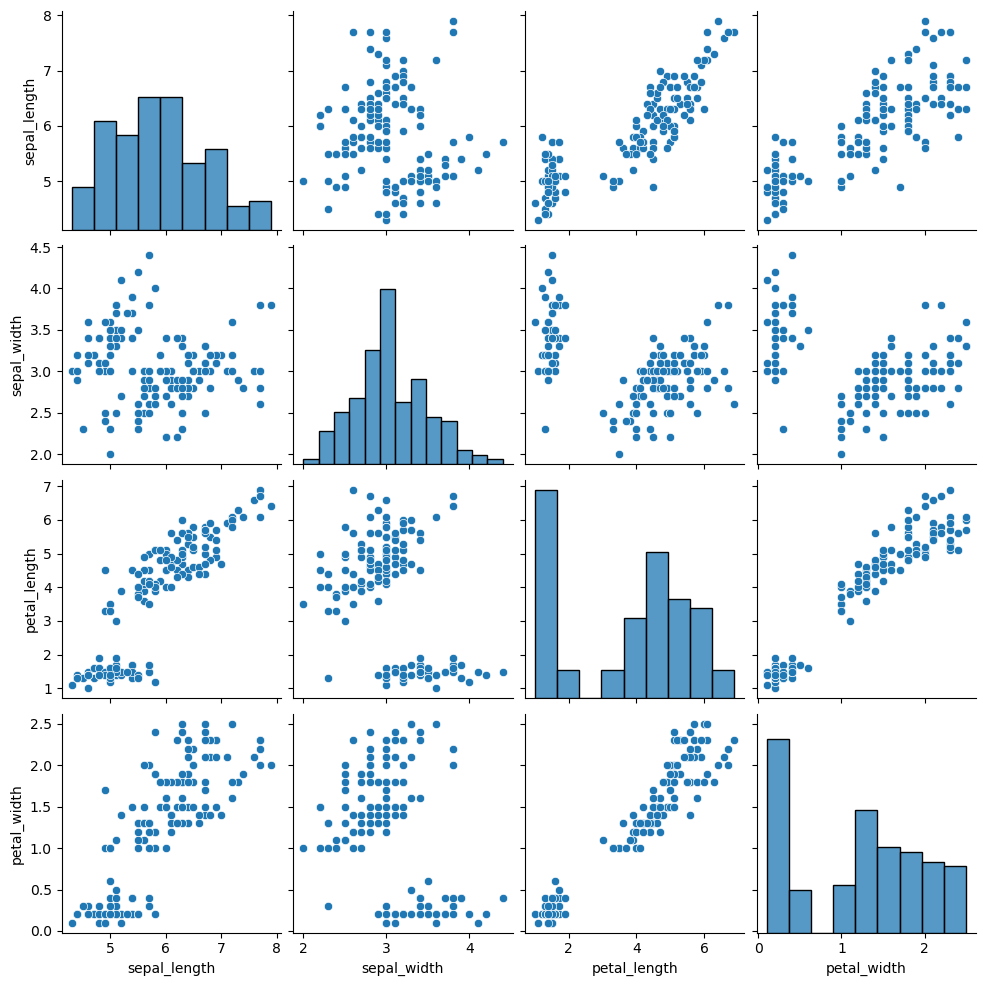

In [36]:
plt.figure(figsize=(10,8))
sns.pairplot(data=data)
plt.show()

### Lets create the dendogram

In [37]:
import scipy.cluster.hierarchy as sc

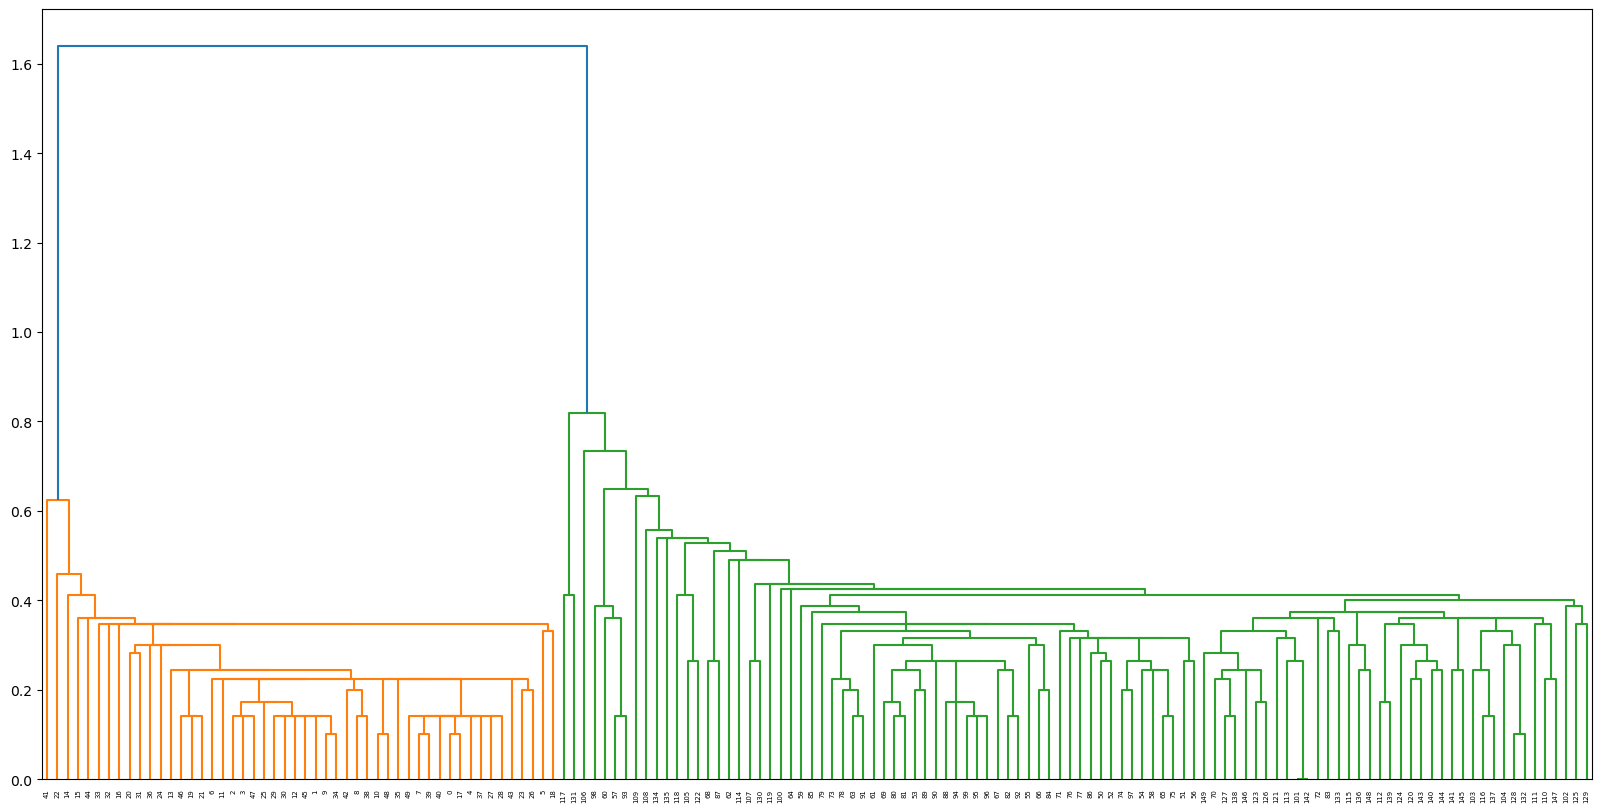

In [38]:
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(raw_data, method='single', metric='euclidean'))
plt.show()

- It is suggesting us two cluster even though the original dataset contains 3. We can see the reason from pairplot too. From the plots, we also observe most of the time we can make only two groups properly.
- Lets assume no. of cluster is 2 for the sake of this algorithm.

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
ac = AgglomerativeClustering(n_clusters=2, linkage='single')
pred = ac.fit_predict(raw_data)

In [41]:
raw_data['Output'] = pred

In [42]:
raw_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Output
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Now lets see how the clusters are made.

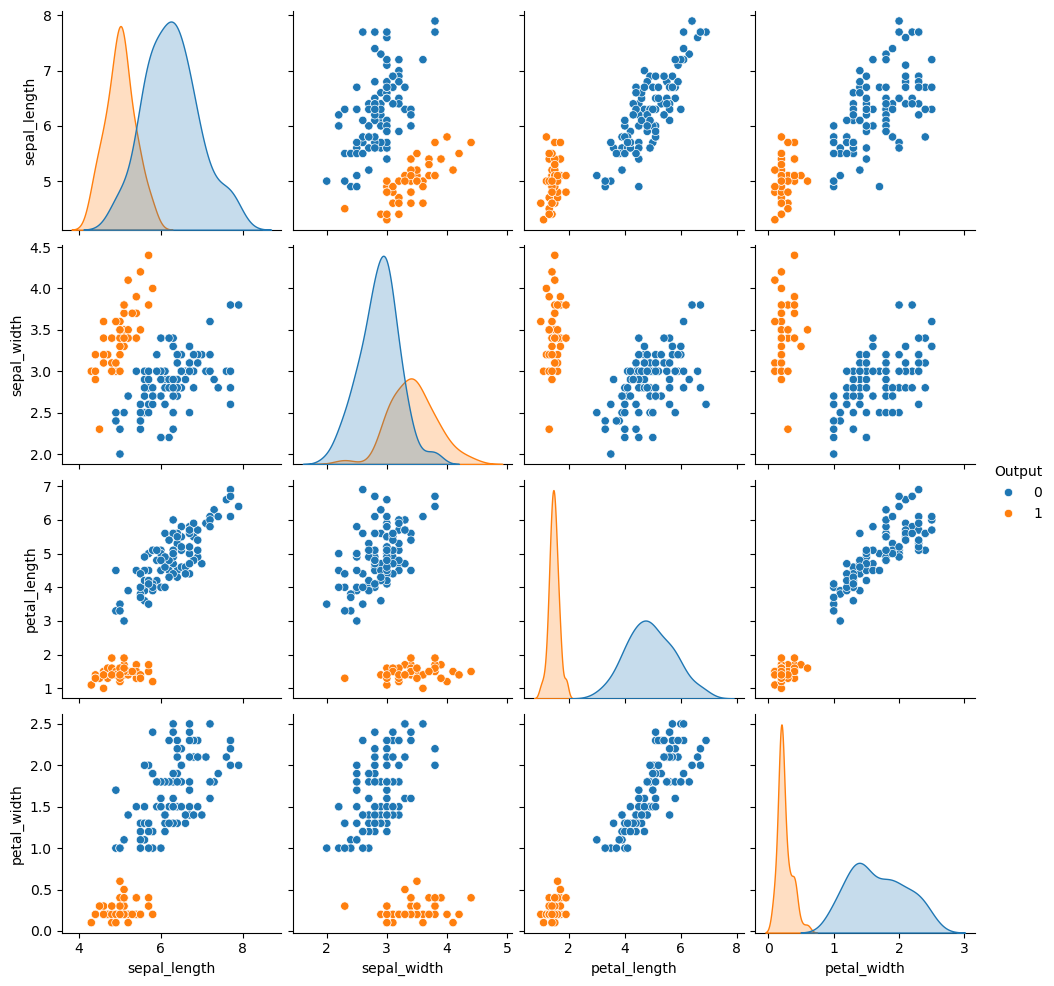

In [44]:
sns.pairplot(data=raw_data, hue='Output')
plt.show()

### Lets check our original data

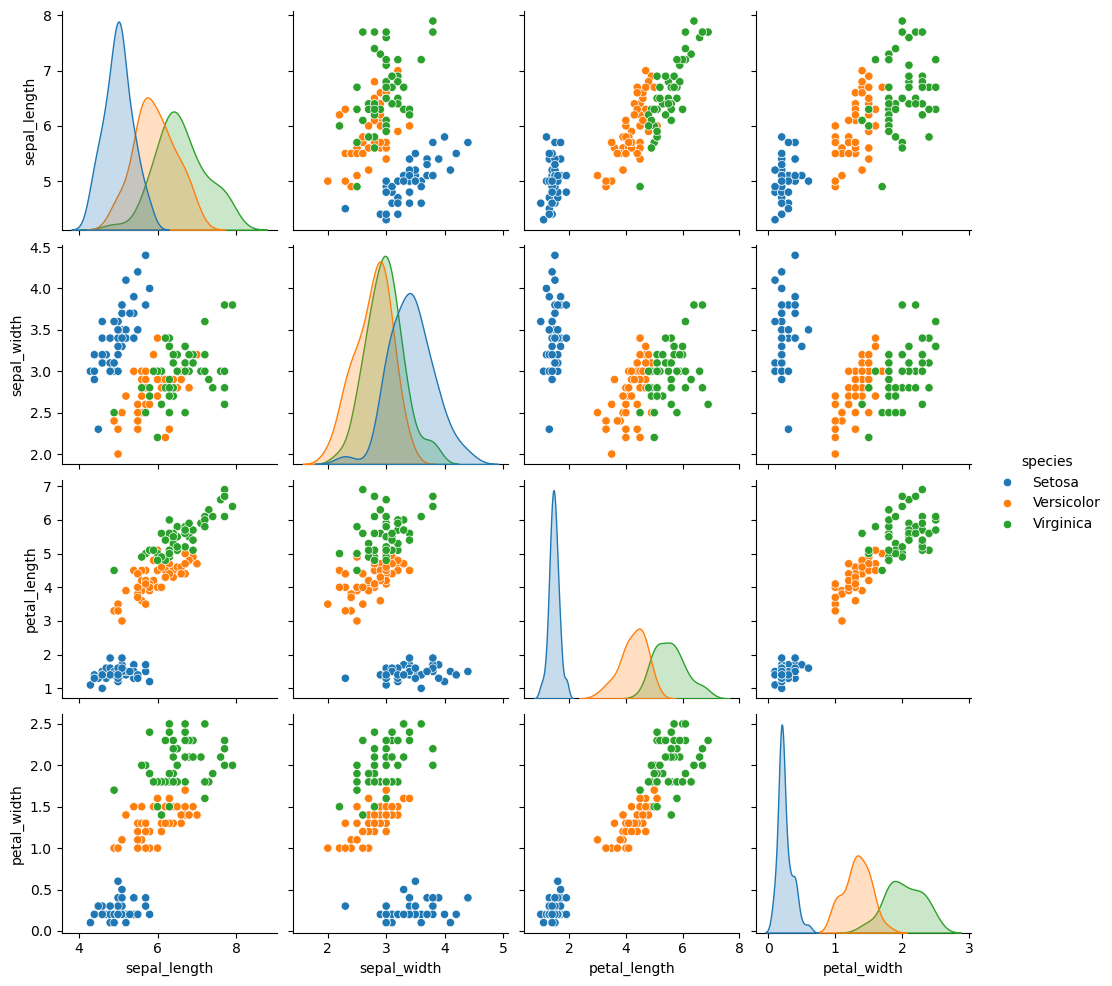

In [45]:
sns.pairplot(data=data, hue='species')
plt.show()

- So it actually clustered the Setosa properly.
- But it grouped Virginica and Versicolor in same group.